In [23]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd

import os, sys
from pprint import pprint
sys.path.extend(('../reframe', '..')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

Gromacs_61k: 10 relevant performance records
Gromacs_1400k: 14 relevant performance records
Gromacs_3000k: 10 relevant performance records


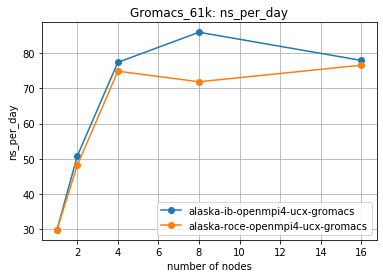

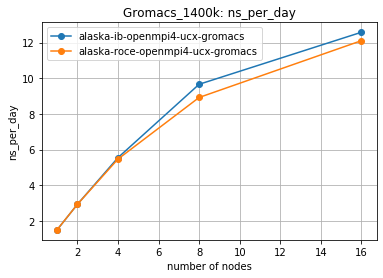

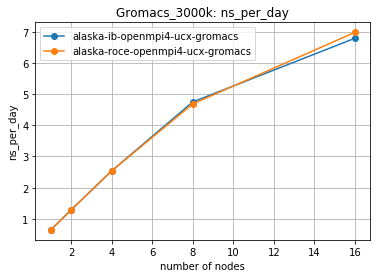

In [57]:
# Plot ns_per_day vs number of nodes, for most-recent test per system/partition/environment
# Higher values are better.

for test in ['Gromacs_61k', 'Gromacs_1400k', 'Gromacs_3000k']:
    
    # Load performance records & filter to those for ns_per_day:
    perf_records = modules.utils.load_perf_logs('../perflogs', test, '.log')
    perf_records = perf_records.loc[perf_records['perf_var'] == 'ns_per_day']
    print('%s: %i relevant performance records' % (test, len(perf_records)))
    #print(perf_records)
    
    # calculate number of nodes:
    perf_records['n_nodes'] = [int(tn.rsplit('_')[-1]) for tn in perf_records['testname']]
    
    # find newest value for each
    
    # plot:
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for spe, data in perf_records.groupby(['sysname', 'partition', 'environ']):
        data = data.drop_duplicates(subset=['n_nodes'], keep='last') # i.e. most recent
        data = data.sort_values(by='n_nodes')
        ax.plot('n_nodes', 'perf_value', 'o-', data=data, label='-'.join(spe))
    
    # format:
    ax.set_title('%s: %s' % (test, 'ns_per_day'))
    ax.legend()
    ax.grid()
    ax.set_xlabel('number of nodes')
    ax.set_ylabel(perf_var)
        

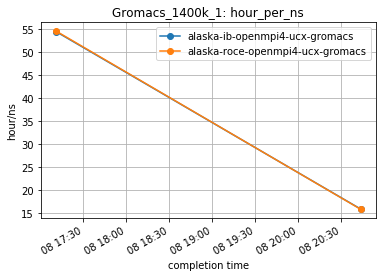

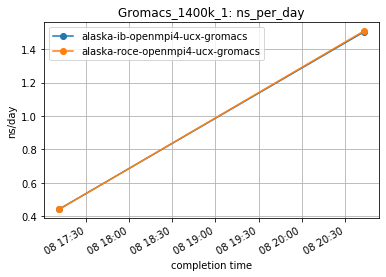

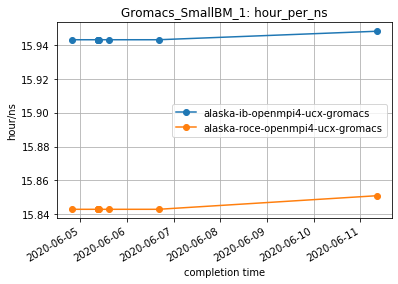

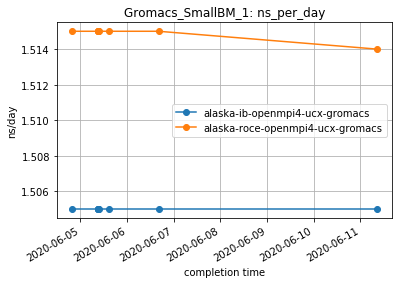

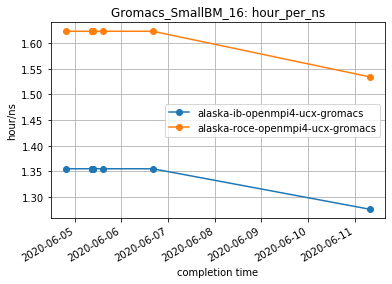

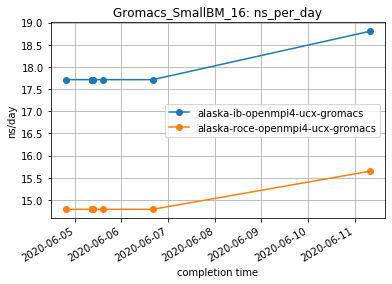

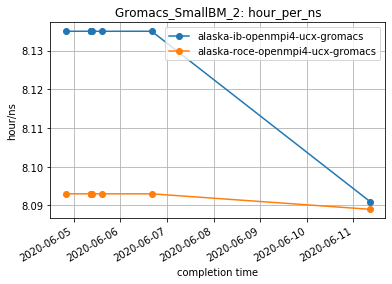

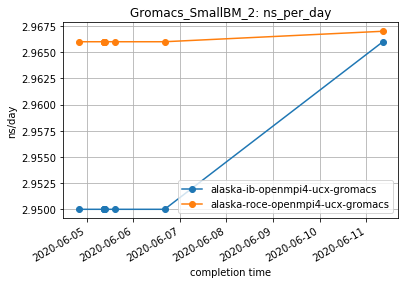

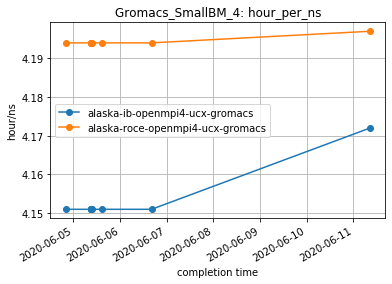

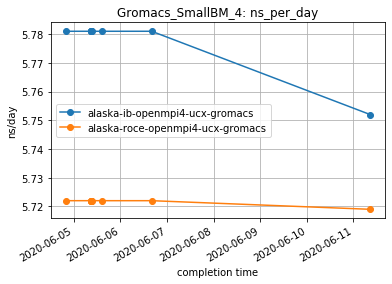

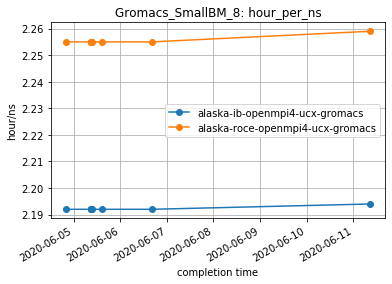

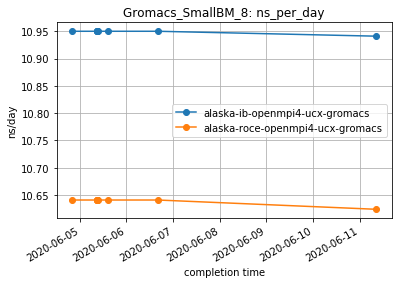

In [6]:
# Plot performance history:
modules.plots.plot_perf_history(perf_records)